**Project topic:**
In this project we will build a model to predict the electrical energy output of a 
[Combined Cycle Power Plant](https://en.wikipedia.org/wiki/Combined_cycle_power_plant), which uses a combination of gas turbines, steam turbines, and heat recovery steam generators to generate power.  We have a set of 9568 hourly average ambient environmental readings from sensors at the power plant which we will use in our model.

The columns in the data consist of hourly average ambient variables:
- **Temperature** (T) in the range 1.81°C to 37.11°C,
- **Ambient Pressure** (AP) in the range 992.89-1033.30 milibar,
- **Relative Humidity** (RH) in the range 25.56% to 100.16%
- **Exhaust Vacuum** (V) in the range 25.36-81.56 cm Hg
- **Net hourly electrical energy output** (PE) 420.26-495.76 MW (Target we are trying to predict)

**Dataset**: [Click here](https://storage.googleapis.com/aipi_datasets/CCPP_data.csv)

**Data source:**

>Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.

>Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

In [40]:
import pandas as pd
import math
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('CCPP_data.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [37]:
# Check if any column has NaN values
nan_check = df.isna().any()

# Check if any column has empty values
empty_check = df.eq('').any()

# Print the columns with NaN values
print("Columns with NaN values:")
print(nan_check)

# Print the columns with empty values
print("Columns with empty values:")
print(empty_check)

Columns with NaN values:
AT    False
V     False
AP    False
RH    False
PE    False
dtype: bool
Columns with empty values:
AT    False
V     False
AP    False
RH    False
PE    False
dtype: bool


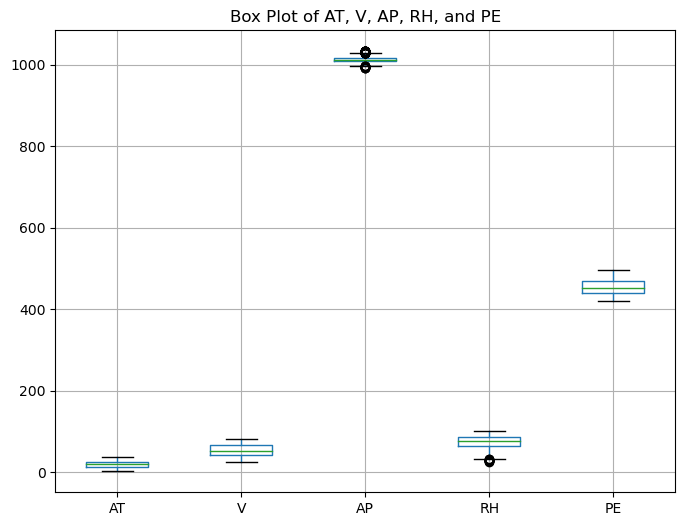

In [39]:
# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
df.boxplot(column=['AT', 'V', 'AP', 'RH', 'PE'])
plt.title('Box Plot of AT, V, AP, RH, and PE')
plt.show()

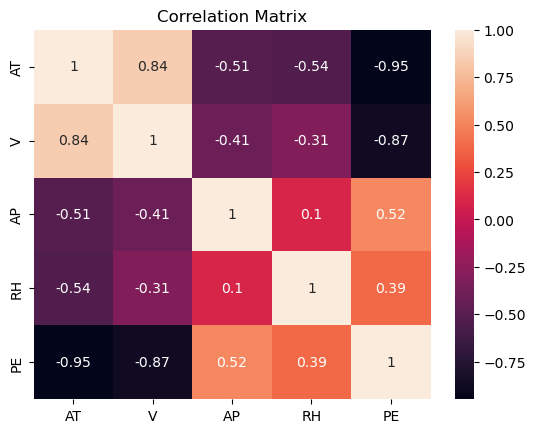

Text(0.5, 1.0, 'Scatter Plot of AP vs PE')

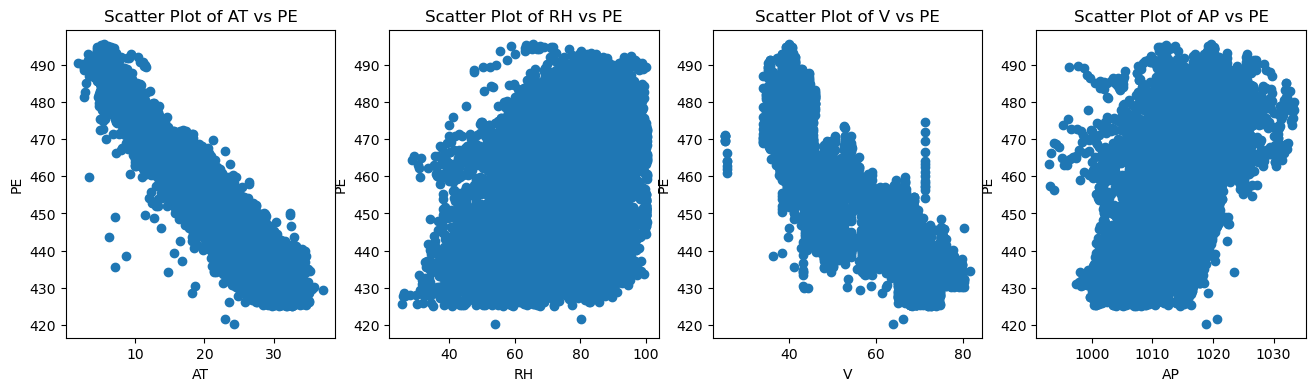

In [42]:
# Check the relationship between the features and the output via heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Check using scatterplot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Scatter plot for AT and PE
axes[0].scatter(df['AT'], df['PE'])
axes[0].set_xlabel('AT')
axes[0].set_ylabel('PE')
axes[0].set_title('Scatter Plot of AT vs PE')

# Scatter plot for RH and PE
axes[1].scatter(df['RH'], df['PE'])
axes[1].set_xlabel('RH')
axes[1].set_ylabel('PE')
axes[1].set_title('Scatter Plot of RH vs PE')

# Scatter plot for V and PE
axes[2].scatter(df['V'], df['PE'])
axes[2].set_xlabel('V')
axes[2].set_ylabel('PE')
axes[2].set_title('Scatter Plot of V vs PE')

# Scatter plot for AP and PE
axes[3].scatter(df['AP'], df['PE'])
axes[3].set_xlabel('AP')
axes[3].set_ylabel('PE')
axes[3].set_title('Scatter Plot of AP vs PE')


In [69]:
# Separate the features from the target variable (net hourly electrical energy output)
X = df[['AT', 'V', 'AP', 'RH']]
#X = df[['AT', 'V']]
y = df['PE']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Select Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = round(mean_squared_error(y_test, y_pred),2)
mae = round(mean_absolute_error(y_test, y_pred),2)
r2 = round(r2_score(y_test, y_pred),2)

# Print evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared Score: ", r2)

Mean Squared Error (MSE):  20.27
Mean Absolute Error (MAE):  3.6
R-squared Score:  0.93


In [74]:
# Compare the previous model with Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = round(mean_squared_error(y_test, y_pred),2)
mae = round(mean_absolute_error(y_test, y_pred),2)
r2 = round(r2_score(y_test, y_pred),2)

# Print evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared Score: ", r2)

Mean Squared Error (MSE):  10.54
Mean Absolute Error (MAE):  2.33
R-squared Score:  0.96


Mean RMSE:  3.3157223199044323
Standard Deviation RMSE:  0.09207247426396148
